In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/test/일별대기오염온도합침.csv')

In [3]:
df.head(1)

,측정일시,이산화질소,오존,일산화탄소,아황산,미세,초미세,평균기온,최고기온,최저기온,일교차
0,20100101,0.038,0.007,0.7,0.007,34.0,NaN,-7.6,-3.6,-12.7,9.1


In [4]:
df['측정일시'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')

In [5]:
df.head(1)

,측정일시,이산화질소,오존,일산화탄소,아황산,미세,초미세,평균기온,최고기온,최저기온,일교차
0,2010-01-01,0.038,0.007,0.7,0.007,34.0,NaN,-7.6,-3.6,-12.7,9.1


In [6]:
df = df[['측정일시','이산화질소','오존','일산화탄소','아황산','미세','평균기온','최고기온','최저기온','일교차']]

In [7]:
df = df.set_index('측정일시')

In [8]:
df.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='측정일시', length=4748, freq=None)

In [9]:
df['최고기온'] = df['최고기온'].fillna(df['최고기온'].mean()).round(1)
df['최저기온'] = df['최저기온'].fillna(df['최저기온'].mean()).round(1)
df['일교차'] = df['일교차'].fillna(df['일교차'].mean()).round(1)


In [10]:
df.isna().sum()

이산화질소    0
오존       0
일산화탄소    0
아황산      0
미세       0
평균기온     0
최고기온     0
최저기온     0
일교차      0
dtype: int64

In [41]:
df

,이산화질소,오존,일산화탄소,아황산,미세,평균기온,최고기온,최저기온,일교차
측정일시,,,,,,,,,
2010-01-01,0.038,0.007,0.7,0.007,34.0,-7.6,-3.6,-12.7,9.1
2010-01-02,0.036,0.009,0.7,0.008,52.0,-3.6,0.2,-7.4,7.6
2010-01-03,0.036,0.014,0.7,0.007,48.0,-6.8,-3.2,-10.5,7.3
2010-01-04,0.038,0.011,0.6,0.005,38.0,-5.9,-3.4,-8.0,4.6
2010-01-05,0.029,0.020,0.5,0.006,49.0,-9.9,-7.0,-12.3,5.3
...,...,...,...,...,...,...,...,...,...
2022-12-27,0.047,0.008,0.9,0.004,49.0,-2.6,3.3,-7.3,10.6
2022-12-28,0.028,0.017,0.6,0.004,35.0,-3.3,0.1,-6.0,6.1
2022-12-29,0.033,0.013,0.6,0.004,30.0,-2.9,2.1,-7.8,9.9


In [11]:
df.head(1)

,이산화질소,오존,일산화탄소,아황산,미세,평균기온,최고기온,최저기온,일교차
측정일시,,,,,,,,,
2010-01-01,0.038,0.007,0.7,0.007,34.0,-7.6,-3.6,-12.7,9.1


In [12]:
df.columns

Index(['이산화질소', '오존', '일산화탄소', '아황산', '미세', '평균기온', '최고기온', '최저기온', '일교차'], dtype='object')

In [13]:
df_feature =  df[['이산화질소', '일산화탄소', '아황산', '미세', '평균기온', '최고기온', '최저기온', '일교차']]

In [14]:
df_target =  df[['오존']]

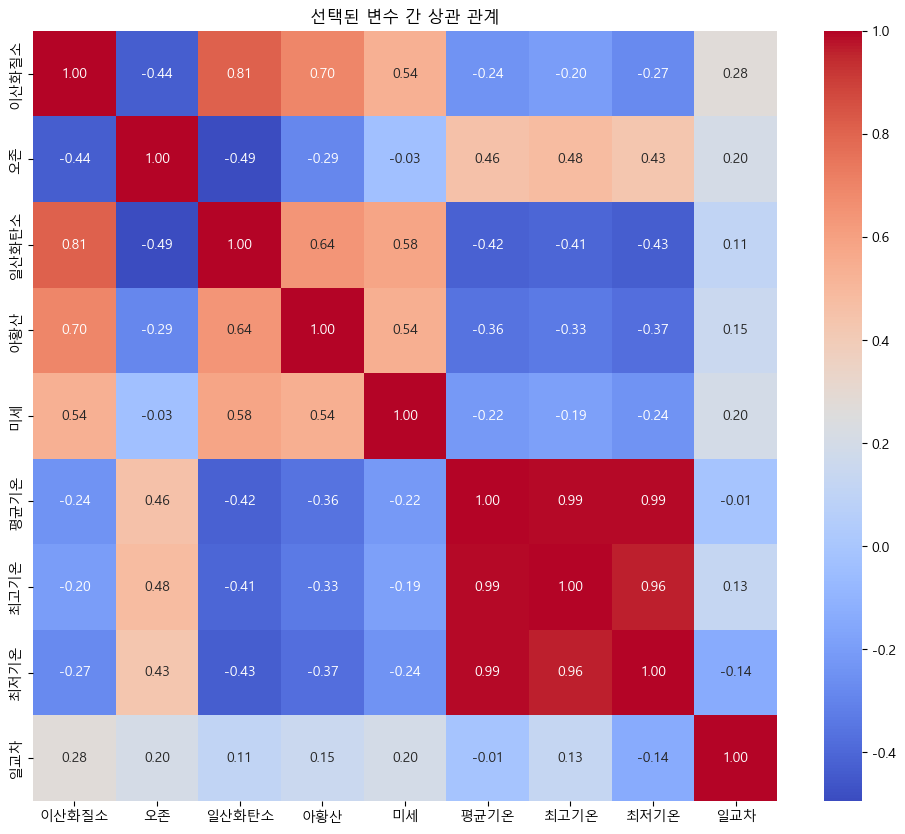

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 전체 상관관계 행렬 계산
full_corr_matrix = df.corr()

# 시각화용 상관관계 행렬 생성 (시간 및 도시 컬럼 제외)
visualization_columns = [col for col in df.columns if 'Year' not in col and 'Month' not in col and not col.startswith('SIDO')]
vis_corr_matrix = df[visualization_columns].corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(vis_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('선택된 변수 간 상관 관계')
plt.show()

In [16]:
df_feature.head(1)

,이산화질소,일산화탄소,아황산,미세,평균기온,최고기온,최저기온,일교차
측정일시,,,,,,,,
2010-01-01,0.038,0.7,0.007,34.0,-7.6,-3.6,-12.7,9.1


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
df_feature.columns , df_target.columns

(Index(['이산화질소', '일산화탄소', '아황산', '미세', '평균기온', '최고기온', '최저기온', '일교차'], dtype='object'),
 Index(['오존'], dtype='object'))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature.values, df_target.values, test_size=0.2, random_state=2023
)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# 결정계수(R Squared)
lr.score(X_test, y_test)

0.414579851787789

In [22]:

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_sv)
mse_sv = mean_squared_error(y_test, y_hat_sv)
r2_sv

-2.33767570558139

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.6719792471394082

In [25]:
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.6719792471394082

In [26]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [27]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth' : [1, 3, 5, 7], 
    'min_samples_leaf' : [1, 3, 5, 7],
    'min_samples_split' : [2, 3, 5, 7] }
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_ , grid_rfr.best_estimator_.score(X_test, y_test)

({'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.2489949618126286)

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100,300,600]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_ , grid_rfr.best_estimator_.score(X_test, y_test)

({'n_estimators': 100}, 0.6719792471394082)

In [29]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.6719792471394082

In [30]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 6, 9,12]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_

{'max_depth': 3}

In [31]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.4127685028829484

In [32]:
params = {'max_depth': [2,3,4,5]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_

{'max_depth': 2}

In [33]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.33250224999052924

In [34]:
params = {'max_depth': [1,1.5,2]}
grid_rfr = GridSearchCV(rfr, params, scoring='accuracy', cv=5)
grid_rfr.fit(X_train, y_train)
grid_rfr.best_params_

{'max_depth': 1}

In [35]:
grid_rfr.best_estimator_.score(X_test, y_test)

0.2489949618126286

In [36]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_hat_xgb = xgbr.predict(X_test)
r2_xgb = r2_score(y_test, y_hat_xgb)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_xgb

0.6295326033837909

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [56]:


# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = df.values

# 데이터 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = df.index[:n_train]
test_dates = df.index[n_train:]

# 데이터셋 재구성
seq_len = 60  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 1])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 1])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]




Epoch 1/30
119/119 [==============================] - 10s 47ms/step - loss: 0.0300 - val_loss: 0.0148
Epoch 2/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 3/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 4/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0084 - val_loss: 0.0107
Epoch 6/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0086 - val_loss: 0.0092
Epoch 7/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0090 - val_loss: 0.0095
Epoch 8/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0084 - val_loss: 0.0093
Epoch 9/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0085 - val_loss: 0.0108
Epoch 10/30
119/119 [==============================] - 4s 35ms/step - loss: 0.0086 - val_l

In [57]:
from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

R-squared (Coefficient of Determination): 0.6333352301694328


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 6.71536496773621e-05
Mean Absolute Error: 0.006278635399440525


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 스케일링
scaler = MinMaxScaler()
df_feature_scaled = scaler.fit_transform(df_feature)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_feature_scaled, df_target.values, test_size=0.2, random_state=2023
)

# 랜덤 포레스트 모델 학습
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train.ravel())  # y_train을 1차원 배열로 변환
y_hat_rf = rfr.predict(X_test)

# 성능 평가
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)

print("R-squared:", r2_rf)


R-squared: 0.6719951216838018


In [51]:
# 실제값의 분산 계산
variance = np.var(testY_transformed)
print("Variance of Actual Values:", variance)

# 분산이 0인지 확인
if variance == 0:
    print("Warning: Variance of actual values is zero. R² cannot be computed.")


Variance of Actual Values: 0.0


In [52]:
# testY_transformed에서 nan 또는 inf 값 확인
if np.isnan(testY_transformed).any() or np.isinf(testY_transformed).any():
    print("Warning: Actual values contain nan or inf.")

# prediction_transformed에서 nan 또는 inf 값 확인
if np.isnan(prediction_transformed).any() or np.isinf(prediction_transformed).any():
    print("Warning: Predicted values contain nan or inf.")


In [40]:
ddddddddddddddddddddddddddddddd

NameError: name 'ddddddddddddddddddddddddddddddd' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 데이터셋 준비
X = df_feature.values
y = df_target.values

# 데이터 정규화
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=2023)

# 데이터셋 재구성
seq_len = 30
input_dim = X_train.shape[1]

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(X_train)):
    trainX.append(X_train[i-seq_len:i, :])
    trainY.append(y_train[i, 0])

for i in range(seq_len, len(X_test)):
    testX.append(X_test[i-seq_len:i, :])
    testY.append(y_test[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=50, batch_size=15, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler_y.inverse_transform(prediction)

testY_transformed = scaler_y.inverse_transform(testY.reshape(-1, 1))


Epoch 1/50
227/227 [==============================] - 14s 35ms/step - loss: 1.0171 - val_loss: 1.0777
Epoch 2/50
227/227 [==============================] - 7s 29ms/step - loss: 1.0057 - val_loss: 1.0774
Epoch 3/50
227/227 [==============================] - 7s 29ms/step - loss: 1.0045 - val_loss: 1.0803
Epoch 4/50
227/227 [==============================] - 7s 30ms/step - loss: 1.0043 - val_loss: 1.0779
Epoch 5/50
227/227 [==============================] - 7s 31ms/step - loss: 1.0039 - val_loss: 1.0851
Epoch 6/50
227/227 [==============================] - 7s 30ms/step - loss: 1.0045 - val_loss: 1.0762
Epoch 7/50
227/227 [==============================] - 7s 30ms/step - loss: 1.0042 - val_loss: 1.0894
Epoch 8/50
227/227 [==============================] - 7s 29ms/step - loss: 1.0032 - val_loss: 1.1082
Epoch 9/50
227/227 [==============================] - 7s 30ms/step - loss: 1.0062 - val_loss: 1.0900
Epoch 10/50
227/227 [==============================] - 7s 32ms/step - loss: 1.0037 - val_l

In [ ]:
from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

R-squared (Coefficient of Determination): -0.0005972210555156288


In [ ]:
dsdddddddddddddddd

NameError: name 'dsdddddddddddddddd' is not defined

In [ ]:
# 내일의 특성 데이터 준비 (예시 데이터)
# 이 부분은 실제로 내일의 데이터로 채워야 합니다.
tomorrow_features = {
    '이산화질소': [값1],
    '일산화탄소': [값2],
    '아황산': [값3],
    '미세': [값4],
    '평균기온': [값5],
    '최고기온': [값6],
    '최저기온': [값7],
    '일교차': [값8]
}

# DataFrame으로 변환
tomorrow_df = pd.DataFrame(tomorrow_features)

# 모델을 사용하여 내일의 오존값 예측
predicted_ozone = rfr.predict(tomorrow_df)

# 예측된 오존값 출력
print(f"예측된 내일의 오존값: {predicted_ozone[0]}")